# Profile grouping by patient id

**This is outdated.**

Doing a train/validation split. 

- Only observations with 5 or less NaN rows in the corresponding eeg. (To be interpolated later.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

base_dir = "../../kaggle_data/hms"
# base_dir = "../../data/hms"
# base_dir = "/kaggle/input/hms-harmful-brain-activity-classification"

df_traincsv = pd.read_csv(f'{base_dir}/train.csv')

# df_traincsv.loc[df_traincsv.expert_consensus == 'Seizure', 'target'] = 0
# df_traincsv.loc[df_traincsv.expert_consensus == 'LPD', 'target'] = 1
# df_traincsv.loc[df_traincsv.expert_consensus == 'GPD', 'target'] = 2
# df_traincsv.loc[df_traincsv.expert_consensus == 'LRDA', 'target'] = 3
# df_traincsv.loc[df_traincsv.expert_consensus == 'GRDA', 'target'] = 4
# df_traincsv.loc[df_traincsv.expert_consensus == 'Other', 'target'] = 5

# df_traincsv[['target']] = df_traincsv[['target']].astype(int)
# print("Loaded train.csv. Added target column.")

idxs_wo_nan = np.load("../data/02_eegs_idxs_up_to_5_nan.npy")
df = df_traincsv.iloc[idxs_wo_nan]

# TARGETS = ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']

df.head()

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


In [2]:
print("Number of observations with 5 or less NaN rows:",len(df))

Number of observations with 5 or less NaN rows: 106358


In [3]:
_df = df.groupby(by='expert_consensus', as_index=False).size()
total = len(df)
_df['percentage'] = _df['size']/total
_df

,expert_consensus,size,percentage
0,GPD,16666,0.156697
1,GRDA,18806,0.176818
2,LPD,14759,0.138767
3,LRDA,16620,0.156265
4,Other,18699,0.175812
5,Seizure,20808,0.195641


<div class="alert alert-block alert-info">&rdsh; Dataset is balanced.</div>

In [4]:
print("Number of patient_id:",len(np.unique(df.patient_id)))
print("Number of eeg_id:",len(np.unique(df.eeg_id)))

Number of patient_id: 1945
Number of eeg_id: 16977


In [5]:
_df = df[['eeg_id','patient_id']].groupby(by=['eeg_id', 'patient_id'], as_index=False).size()
print("Max number of patient_id per eeg_id:", _df.groupby(by=['eeg_id'], as_index=False).size()['size'].max() )

Max number of patient_id per eeg_id: 1


<div class="alert alert-block alert-info">&rdsh; This means there is only one patient_id for each eeg_id, as expected.</div>

Inspecting the distribution of target values respect to patient_id.

In [88]:
_df = df.groupby(by=['patient_id', 'expert_consensus'], as_index=False).size()
_df

,patient_id,expert_consensus,size
0,56,Other,60
1,105,GRDA,11
2,105,LPD,5
3,105,Other,38
4,149,GRDA,9
...,...,...,...
3609,65430,Seizure,10
3610,65442,Other,25
3611,65442,Seizure,5
3612,65480,Other,9


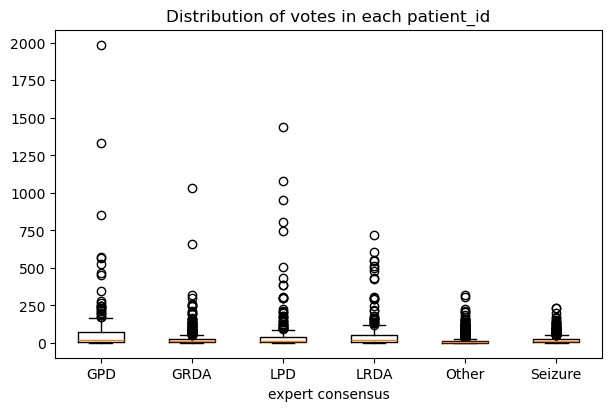

In [89]:
consensus = np.unique(df['expert_consensus'])
x1 = [np.array(_df.loc[_df['expert_consensus'] == c]['size']) for c in consensus]

fig, ax = plt.subplots(1, 1, figsize=(6, 4), layout='constrained')

ax.boxplot(x1, vert=True, labels=consensus)

ax.set_ylabel('')
ax.set_xlabel('expert consensus')
ax.set_title('Distribution of votes in each patient_id')

plt.show()

In [6]:
_df = df.groupby(by=['eeg_id', 'expert_consensus'], as_index=False).size()
_df

,eeg_id,expert_consensus,size
0,568657,Other,4
1,582999,LPD,11
2,642382,Other,2
3,751790,GPD,1
4,778705,Other,1
...,...,...,...
17892,4293354003,GRDA,1
17893,4293843368,GRDA,1
17894,4294455489,Other,1
17895,4294858825,Other,5


In [11]:
__df = _df.groupby(by=['eeg_id'], as_index=False).size()
__df.loc[__df['size'] > 1]

,eeg_id,size
80,21379701,3
122,32067830,2
137,36718960,2
144,37347312,2
161,42319244,2
...,...,...
16890,4268492759,2
16921,4279656286,2
16933,4282888597,2
16936,4283246598,2


<div class="alert alert-block alert-info">&rdsh; Only 779 eegs contain different targets. Most eegs have only one target.</div>

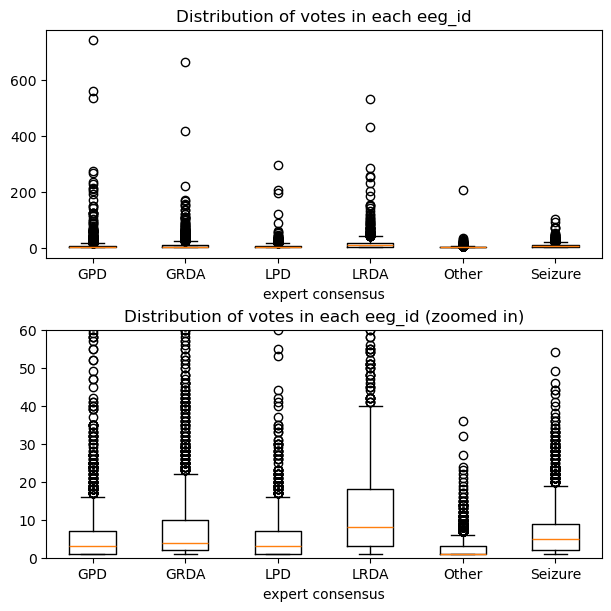

In [91]:
consensus = np.unique(df['expert_consensus'])
x1 = [np.array(_df.loc[_df['expert_consensus'] == c]['size']) for c in consensus]

fig, ax = plt.subplots(2, 1, figsize=(6, 6), layout='constrained')

ax[0].boxplot(x1, vert=True, labels=consensus)

ax[0].set_ylabel('')
ax[0].set_xlabel('expert consensus')
ax[0].set_title('Distribution of votes in each eeg_id')

ax[1].boxplot(x1, vert=True, labels=consensus)

ax[1].set_ylabel('')
ax[1].set_xlabel('expert consensus')
ax[1].set_title('Distribution of votes in each eeg_id (zoomed in)')
ax[1].set_ylim(bottom=0,top=60)

plt.show()

According to these plots, there eegs with the same vote repeated a lot of times. This looks like oversampling the same observation: inside the same eeg, the same vote for a short offset of time, it looks like they are voting on the same observation.



## Train/Validation split without cutoff (v1)

Using all observations in eegs with 5 or less NaN rows.

(As opposed to removing "repeated observations", the same vote many times inside the same eeg.)

In [42]:
#
# Train/Val split (v1)
#

ptrain = 0.8

# Set the seed for reproducibility.
rng = np.random.default_rng(113)
# rng = np.random.default_rng(45163)
# rng = np.random.default_rng(3233)

ids = rng.permutation(np.unique(df['patient_id']))
cut = int(ptrain * len(ids))
idxs_train = df.loc[df['patient_id'].isin(ids[0:cut])].index
idxs_val = df.loc[df['patient_id'].isin(ids[cut:])].index

print("Train samples:", len(idxs_train))
print("Validation samples:", len(idxs_val))

#
# -----------------
#

# Check the balance.

# Training set
_df = df_traincsv.iloc[idxs_train].groupby(by='expert_consensus', as_index=False).size()
total = len(idxs_train)
_df['percentage'] = _df['size']/total
print("Training set:")
display(_df)

# Validation set
_df = df_traincsv.iloc[idxs_val].groupby(by='expert_consensus', as_index=False).size()
total = len(idxs_val)
_df['percentage'] = _df['size']/total
print("Validation set:")
display(_df)

Train samples: 84191
Validation samples: 22167
Training set:


,expert_consensus,size,percentage
0,GPD,13001,0.154423
1,GRDA,15341,0.182217
2,LPD,11469,0.136226
3,LRDA,13212,0.156929
4,Other,14760,0.175316
5,Seizure,16408,0.194890


Validation set:


,expert_consensus,size,percentage
0,GPD,3665,0.165336
1,GRDA,3465,0.156313
2,LPD,3290,0.148419
3,LRDA,3408,0.153742
4,Other,3939,0.177697
5,Seizure,4400,0.198493
